In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]
# columns = pd.read_csv(data_url, sep="\s{2,}", skiprows=6, nrows = 14)
# columns = columns.reset_index()

data_url1 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(data_url1)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## Task 1: Understanding the data

| Column Name | Column Description                                                |
|---------|-----------------------------------------------------------------------|
| CRIM    | per capita crime rate by town                                         |
| ZN      | proportion of residential land zoned for lots over 25,000 sq.ft.      |
| INDUS   | proportion of non-retail business acres per town                      |
| CHAS    | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX     | nitric oxides concentration (parts per 10 million)                    |
| RM      | average number of rooms per dwelling                                  |
| AGE     | proportion of owner-occupied units built prior to 1940                |
| DIS     | weighted distances to five Boston employment centres                  |
| RAD     | index of accessibility to radial highways                             |
| TAX     | full-value property-tax rate per `$10,000`                            |
| PTRATIO | pupil-teacher ratio by town                                           |
| B       | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town        |
| LSTAT   | `% lower status of the population`                                    |
| MEDV    | Median value of owner-occupied homes in $1000's                       |

## Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

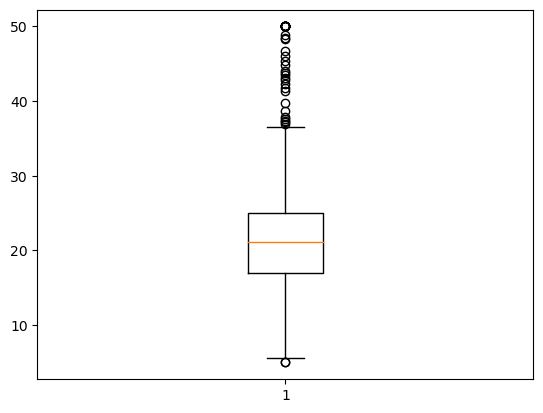

In [2]:
## For the "Median value of owner-occupied homes" provide a boxplot
# boston_df.boxplot(column = 'MEDV')
plt.boxplot(boston_df.MEDV)
plt.show()

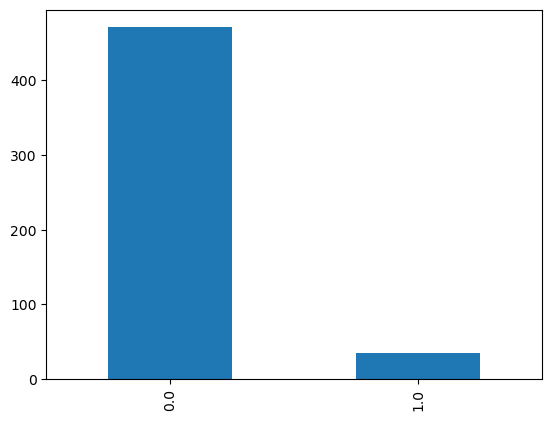

In [3]:
## Provide a bar plot for the Charles river variable
boston_df.CHAS.value_counts().plot.bar(x = 'index', y = 'CHAS')
plt.show()

Greater than 70          287
Between 35 to 70         128
Less than equal to 35     91
Name: AGE_discrete, dtype: int64


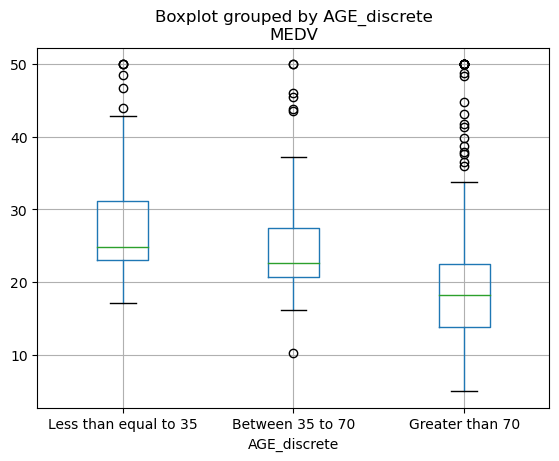

In [4]:
## Provide a boxplot for the MEDV variable vs the AGE variable. 
## (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df["AGE_discrete"] = pd.cut(boston_df.AGE, bins = [0, 35, 70, 110], labels = ["Less than equal to 35", 
                                                                                     "Between 35 to 70", "Greater than 70"])
print(boston_df.AGE_discrete.value_counts())
# print(boston_df.columns)
# boston_df.boxplot(column = 'AGE')
boston_df.boxplot(column = 'MEDV', by = "AGE_discrete")
plt.show()

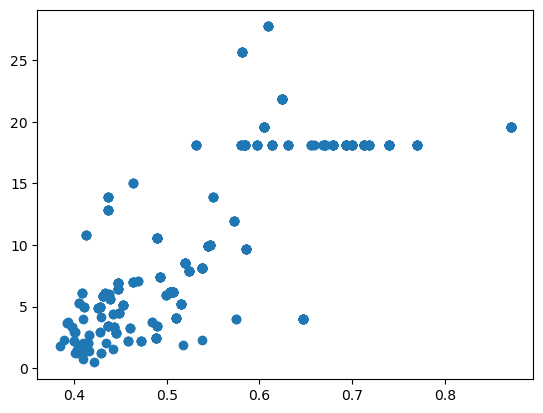

In [5]:
## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
## What can you say about the relationship?
plt.scatter(x = boston_df.NOX, y = boston_df.INDUS)
plt.show()

#### Conclusion for scatter plot
There is a clear trend of increase in nitric oxide concentrations with an increase in proportion of non-retail or industrial business per acre in a town.

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64


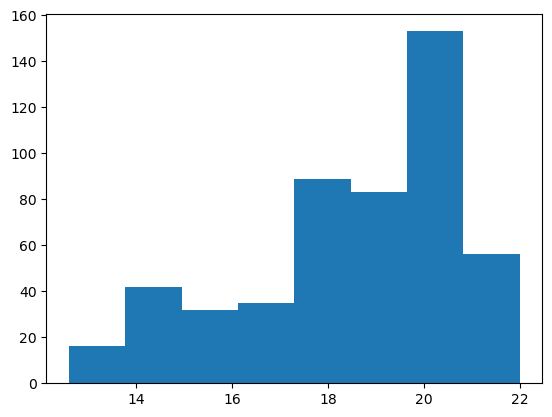

In [6]:
## Create a histogram for the pupil to teacher ratio variable
print(boston_df.PTRATIO.describe())
plt.hist(boston_df.PTRATIO, bins = 8)
plt.show()

## Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [7]:
## Is there a significant difference in median value of houses bounded by the Charles river or not? 
## (T-test for independent samples)
stats.ttest_ind(boston_df['MEDV'][boston_df['CHAS'] == 1],
                boston_df['MEDV'][boston_df['CHAS'] == 0])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

### T-test result interpretation

There is a statistically significant difference in the median value of houses bound by the Charles river compared to the house that are not bound by the river. The p-value of 0.00007, along with t-statistic of 3.996 indicate this statistically significant difference in the median values of houses bound by the Charles river and the ones not bound by the river.

In [8]:
## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 
## (ANOVA)
from scipy.stats import f_oneway
f_oneway(boston_df[boston_df['AGE_discrete'] == 'Greater than 70']['MEDV'], 
         boston_df[boston_df['AGE_discrete'] == 'Between 35 to 70']['MEDV'], 
         boston_df[boston_df['AGE_discrete'] == 'Less than equal to 35']['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

#### Anova Interpretation
Based on the ANOVA results, it is statisically unlikely that the three samples have the same mean values. It means that there is a significant difference in the median values of the houses for each proportion of owner occupied units.  

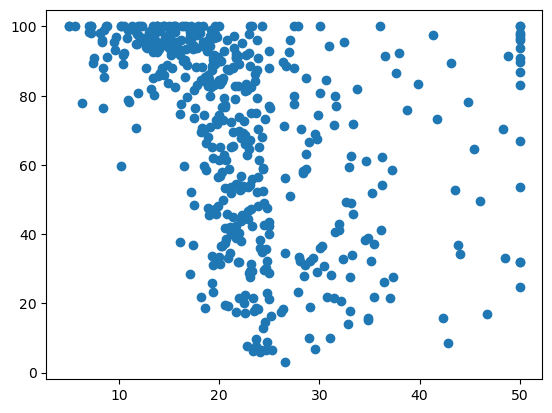

In [9]:
plt.scatter(x = boston_df.MEDV, y = boston_df.AGE)
plt.show()

In [10]:
## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
## (Pearson Correlation)
boston_df.NOX.corr(boston_df.INDUS)

0.763651446920914

#### Pearson Correlation interpretation
Pearson correlation coefficient of 0.76 indicates a strong positive linear relationship between nitric oxide concentrations and proportion of non-retail business acres in a town. <br> 
The strong positive correlation indicates that areas with a higher proportion of industrial (non-retail business) land tend to have higher concentrations of nitric oxides in the air. This makes intuitive sense as industrial activities typically contribute to higher emissions of pollutants like NOX.

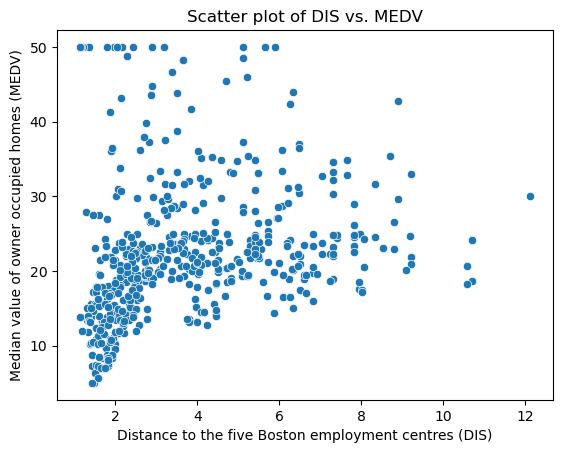

In [11]:
## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? 
## (Regression analysis)
sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
plt.title('Scatter plot of DIS vs. MEDV')
plt.xlabel('Distance to the five Boston employment centres (DIS)')
plt.ylabel('Median value of owner occupied homes (MEDV)')
plt.show()

In [12]:
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        10:36:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

#### Regression Interpretation
The regression analysis indicates a statistically significant but weak positive relationship between the distance to Boston's 5 major employment centers (DIS) and the median value of homes (MEDV).
The low R-squared value suggests that DIS explains only a small portion of the variability in MEDV. There are likely other factors may have a stronger influence on home prices.